In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.sort_values('Datetime',ascending=True,inplace=True)
df.columns=['date_time','aep_mw']

In [3]:
df.head()

,date_time,aep_mw
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0


In [4]:
def preparion (df,num_lags,lag_feature):
    #df_prpocessed=pd.DataFrame(index=df.index,columns=['date_time','cos_day_year','sin_day_year',
    #                                                   'cos_day_week','sin_day_week','cos_hour','sin_hour']+['lags_{}'.format(i) for i in range(num_lags)]+['target'])
    df_prpocessed=pd.DataFrame(index=df.index,columns=[['lags_{}'.format(i) for i in range(num_lags)]+['target']])
    df_prpocessed['target']=df[lag_feature].shift(-1)
    for i in range(num_lags):
        df_prpocessed['lags_{}'.format(i)]=df[lag_feature].shift(i)

    df_prpocessed.index=df['date_time']

    #a=pd.Series(pd.to_datetime(df_prpocessed['date_time']))+timedelta(hours=1)
    #df_prpocessed['cos_day_year']=pd.Series(np.cos(2*np.pi*a.dt.day_of_year/366),index=df_prpocessed.index)
    #df_prpocessed['sin_day_year']=pd.Series(np.sin(2*np.pi*a.dt.day_of_year/366),index=df_prpocessed.index)
    #df_prpocessed['cos_day_week']=pd.Series(np.cos(2*np.pi*a.dt.day/7),index=df_prpocessed.index)
    #df_prpocessed['sin_day_week']=pd.Series(np.sin(2*np.pi*a.dt.day/7),index=df_prpocessed.index)
    #df_prpocessed['cos_hour']=pd.Series(np.cos(2*np.pi*a.dt.hour/24),index=df_prpocessed.index)
    #df_prpocessed['sin_hour']=pd.Series(np.sin(2*np.pi*a.dt.hour/24),index=df_prpocessed.index)
    
    
    #df_prpocessed.index=list(df_prpocessed['date_time'])
    #df_prpocessed.drop('date_time',axis=1,inplace=True)
    df_prpocessed.dropna(inplace=True)
    return df_prpocessed

In [5]:
train_df=df[df['date_time']<='2017-08-02 23:00:00']
train_df=preparion(train_df,168*4+1,'aep_mw')
train_df

,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,...,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671,lags_672,target
date_time,,,,,,,,,,,,,,,,,,,,,
2004-10-29 01:00:00,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,15028.0,15143.0,...,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0,12022.0
2004-10-29 02:00:00,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,15028.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,11753.0
2004-10-29 03:00:00,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11530.0
2004-10-29 04:00:00,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11744.0
2004-10-29 05:00:00,11744.0,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,12355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-02 18:00:00,19585.0,19749.0,19921.0,19797.0,19347.0,18576.0,17618.0,16785.0,15683.0,14853.0,...,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,19046.0,19451.0,19151.0
2017-08-02 19:00:00,19151.0,19585.0,19749.0,19921.0,19797.0,19347.0,18576.0,17618.0,16785.0,15683.0,...,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,19046.0,18495.0
2017-08-02 20:00:00,18495.0,19151.0,19585.0,19749.0,19921.0,19797.0,19347.0,18576.0,17618.0,16785.0,...,12478.0,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,17771.0


In [6]:
X_train=train_df.drop('target',axis=1)
y_train=train_df[['target']]

In [7]:
X_train

,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,...,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671,lags_672
date_time,,,,,,,,,,,,,,,,,,,,,
2004-10-29 01:00:00,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,15028.0,15143.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0
2004-10-29 02:00:00,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,15028.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0
2004-10-29 03:00:00,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0
2004-10-29 04:00:00,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0
2004-10-29 05:00:00,11744.0,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,...,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-02 18:00:00,19585.0,19749.0,19921.0,19797.0,19347.0,18576.0,17618.0,16785.0,15683.0,14853.0,...,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,19046.0,19451.0
2017-08-02 19:00:00,19151.0,19585.0,19749.0,19921.0,19797.0,19347.0,18576.0,17618.0,16785.0,15683.0,...,12478.0,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0,19046.0
2017-08-02 20:00:00,18495.0,19151.0,19585.0,19749.0,19921.0,19797.0,19347.0,18576.0,17618.0,16785.0,...,12533.0,12478.0,12821.0,13232.0,13913.0,14963.0,16291.0,17299.0,17794.0,18394.0


In [12]:
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split


In [ ]:

X_fit,X_val,y_fit,y_val=train_test_split(X_train,y_train,test_size=0.3)
# Bench model 
model=XGBRegressor(objective='reg:absoluteerror',tree_method='hist',n_estimators=10000,learning_rate=0.1,max_depth=5,eval_metric='mape',n_jobs=-1,early_stopping_rounds=50).fit(X_val,y_val,eval_set=[(X_val,y_val)])

In [9]:
test_df=preparion(df,168*4+1,'aep_mw')
test_df=test_df[test_df.index>'2017-08-02 23:00:00']
test_df.head()

,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,...,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671,lags_672,target
date_time,,,,,,,,,,,,,,,,,,,,,
2017-08-03 00:00:00,14812.0,16100.0,17220.0,17771.0,18495.0,19151.0,19585.0,19749.0,19921.0,19797.0,...,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,13232.0,13913.0,14963.0,13682.0
2017-08-03 01:00:00,13682.0,14812.0,16100.0,17220.0,17771.0,18495.0,19151.0,19585.0,19749.0,19921.0,...,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,13232.0,13913.0,12841.0
2017-08-03 02:00:00,12841.0,13682.0,14812.0,16100.0,17220.0,17771.0,18495.0,19151.0,19585.0,19749.0,...,15524.0,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,13232.0,12443.0
2017-08-03 03:00:00,12443.0,12841.0,13682.0,14812.0,16100.0,17220.0,17771.0,18495.0,19151.0,19585.0,...,16237.0,15524.0,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12821.0,12213.0
2017-08-03 04:00:00,12213.0,12443.0,12841.0,13682.0,14812.0,16100.0,17220.0,17771.0,18495.0,19151.0,...,16773.0,16237.0,15524.0,14929.0,14174.0,13523.0,12946.0,12533.0,12478.0,12286.0


In [ ]:
test_df.index[0]

In [10]:
X_test=test_df.drop('target',axis=1)
y_test=test_df['target']

In [127]:
model=XGBRegressor(tree_method='hist',n_estimators=20000,learning_rate=0.1,max_depth=5,eval_metric='mae',n_jobs=-1).fit(X_train,y_train,eval_set=[(X_test,y_test)])
pred=model.predict(X_test)

[0]	validation_0-mae:13466.44504
[1]	validation_0-mae:12119.47526
[2]	validation_0-mae:10906.98786
[3]	validation_0-mae:9815.65357
[4]	validation_0-mae:8832.87987
[5]	validation_0-mae:7948.68052
[6]	validation_0-mae:7153.08682
[7]	validation_0-mae:6436.24728
[8]	validation_0-mae:5791.71491
[9]	validation_0-mae:5212.32070
[10]	validation_0-mae:4690.15475
[11]	validation_0-mae:4221.14803
[12]	validation_0-mae:3798.60483
[13]	validation_0-mae:3417.83747
[14]	validation_0-mae:3075.53907
[15]	validation_0-mae:2767.37899
[16]	validation_0-mae:2489.82339
[17]	validation_0-mae:2240.14204
[18]	validation_0-mae:2015.85105
[19]	validation_0-mae:1813.81028
[20]	validation_0-mae:1631.99100
[21]	validation_0-mae:1468.12109
[22]	validation_0-mae:1320.72151
[23]	validation_0-mae:1187.70543
[24]	validation_0-mae:1068.50853
[25]	validation_0-mae:960.97526
[26]	validation_0-mae:864.12437
[27]	validation_0-mae:777.58134
[28]	validation_0-mae:699.28894
[29]	validation_0-mae:629.25909
[30]	validation_0-mae:

In [17]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_percentage_error(y_test,pred),mean_absolute_error(y_test,pred)

(0.008034597997247424, 119.42726649454195)

<Axes: xlabel='date_time'>

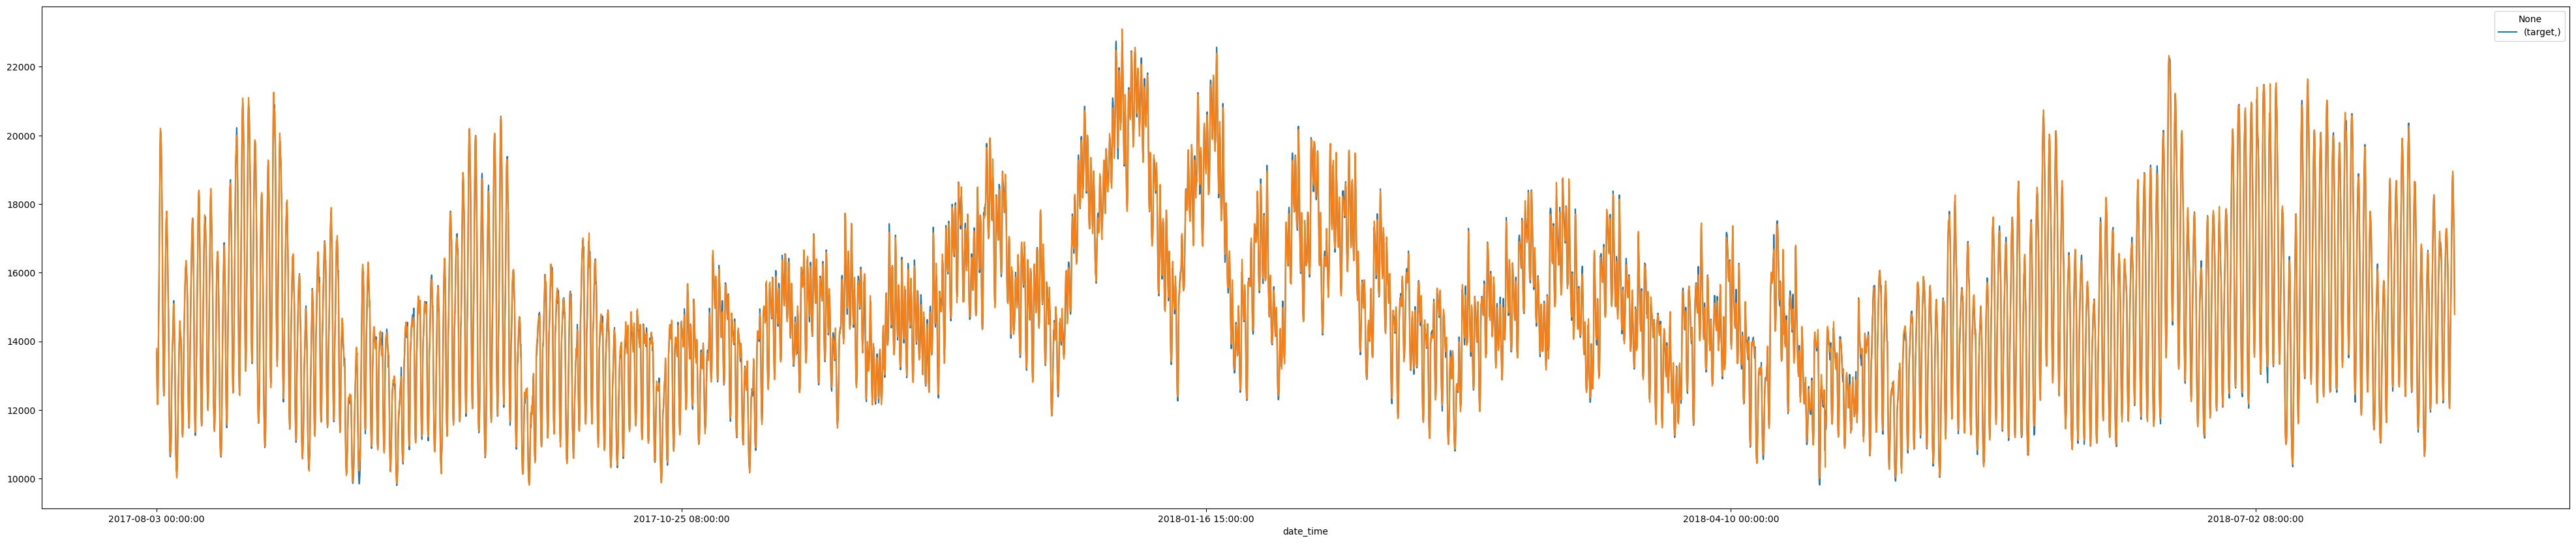

In [18]:
y_test.plot()
pd.Series(pred.reshape(-1)).plot(figsize=(50,10))

In [25]:
dateTimeIndex=df.iloc[-168*53-2:]['date_time']
test_start_hear=dateTimeIndex.iloc[0]
test_start_hear

'2017-07-27 23:00:00'

In [105]:
def dayahead_forecast(df,selected_date):
   pred_df=pd.DataFrame(index=range(1,41),columns=['date_time','forecast'])
   new_X=preparion(df[df['date_time']<=selected_date].tail(1000),168*4+1,'aep_mw').drop('target',axis=1).tail(1)
   new_X.index=[0]
   invest_mat=new_X
   for i in range(1,41):

      pred_df.loc[i,'date_time']=str(datetime.strptime(selected_date,'%Y-%m-%d %H:%M:%S')+timedelta(hours=i))
      pred=model.predict(new_X)[0]
      pred_df.loc[i,'forecast']=pred
      new_X=new_X.shift(1,axis=1)
      new_X.loc[0,'lags_0']=pred
      invest_mat=pd.concat([invest_mat,new_X])

   #pred_df=pred_df.iloc[16:]
   pred_df=pred_df.merge(df,on=['date_time'])
   pred_df.index=pred_df['date_time']
   pred_df.drop('date_time',axis=1,inplace=True)
   
   return pred_df

In [109]:
a=df[df['date_time']>test_start_hear]
a['date_time']=pd.to_datetime(a['date_time'])
date_time_list=a.loc[(a['date_time'].dt.hour==8),'date_time']
date_time_list[:-1]

111130   2017-07-28 08:00:00
111106   2017-07-29 08:00:00
111082   2017-07-30 08:00:00
111058   2017-07-31 08:00:00
111034   2017-08-01 08:00:00
                 ...        
116265   2018-07-28 08:00:00
116241   2018-07-29 08:00:00
116217   2018-07-30 08:00:00
116193   2018-07-31 08:00:00
116169   2018-08-01 08:00:00
Name: date_time, Length: 370, dtype: datetime64[ns]

In [143]:
forecast_dayahead=pd.DataFrame()
for d_t in date_time_list[:-1]:
    d_t=str(d_t)
    temp=dayahead_forecast(df,d_t)
    temp=temp.iloc[16:]
    forecast_dayahead=pd.concat([forecast_dayahead,temp])
    print(d_t)


2017-07-28 08:00:00
2017-07-29 08:00:00
2017-07-30 08:00:00
2017-07-31 08:00:00
2017-08-01 08:00:00
2017-08-02 08:00:00
2017-08-03 08:00:00
2017-08-04 08:00:00
2017-08-05 08:00:00
2017-08-06 08:00:00
2017-08-07 08:00:00
2017-08-08 08:00:00
2017-08-09 08:00:00
2017-08-10 08:00:00
2017-08-11 08:00:00
2017-08-12 08:00:00
2017-08-13 08:00:00
2017-08-14 08:00:00
2017-08-15 08:00:00
2017-08-16 08:00:00
2017-08-17 08:00:00
2017-08-18 08:00:00
2017-08-19 08:00:00
2017-08-20 08:00:00
2017-08-21 08:00:00
2017-08-22 08:00:00
2017-08-23 08:00:00
2017-08-24 08:00:00
2017-08-25 08:00:00
2017-08-26 08:00:00
2017-08-27 08:00:00
2017-08-28 08:00:00
2017-08-29 08:00:00
2017-08-30 08:00:00
2017-08-31 08:00:00
2017-09-01 08:00:00
2017-09-02 08:00:00
2017-09-03 08:00:00
2017-09-04 08:00:00
2017-09-05 08:00:00
2017-09-06 08:00:00
2017-09-07 08:00:00
2017-09-08 08:00:00
2017-09-09 08:00:00
2017-09-10 08:00:00
2017-09-11 08:00:00
2017-09-12 08:00:00
2017-09-13 08:00:00
2017-09-14 08:00:00
2017-09-15 08:00:00


<Axes: xlabel='date_time'>

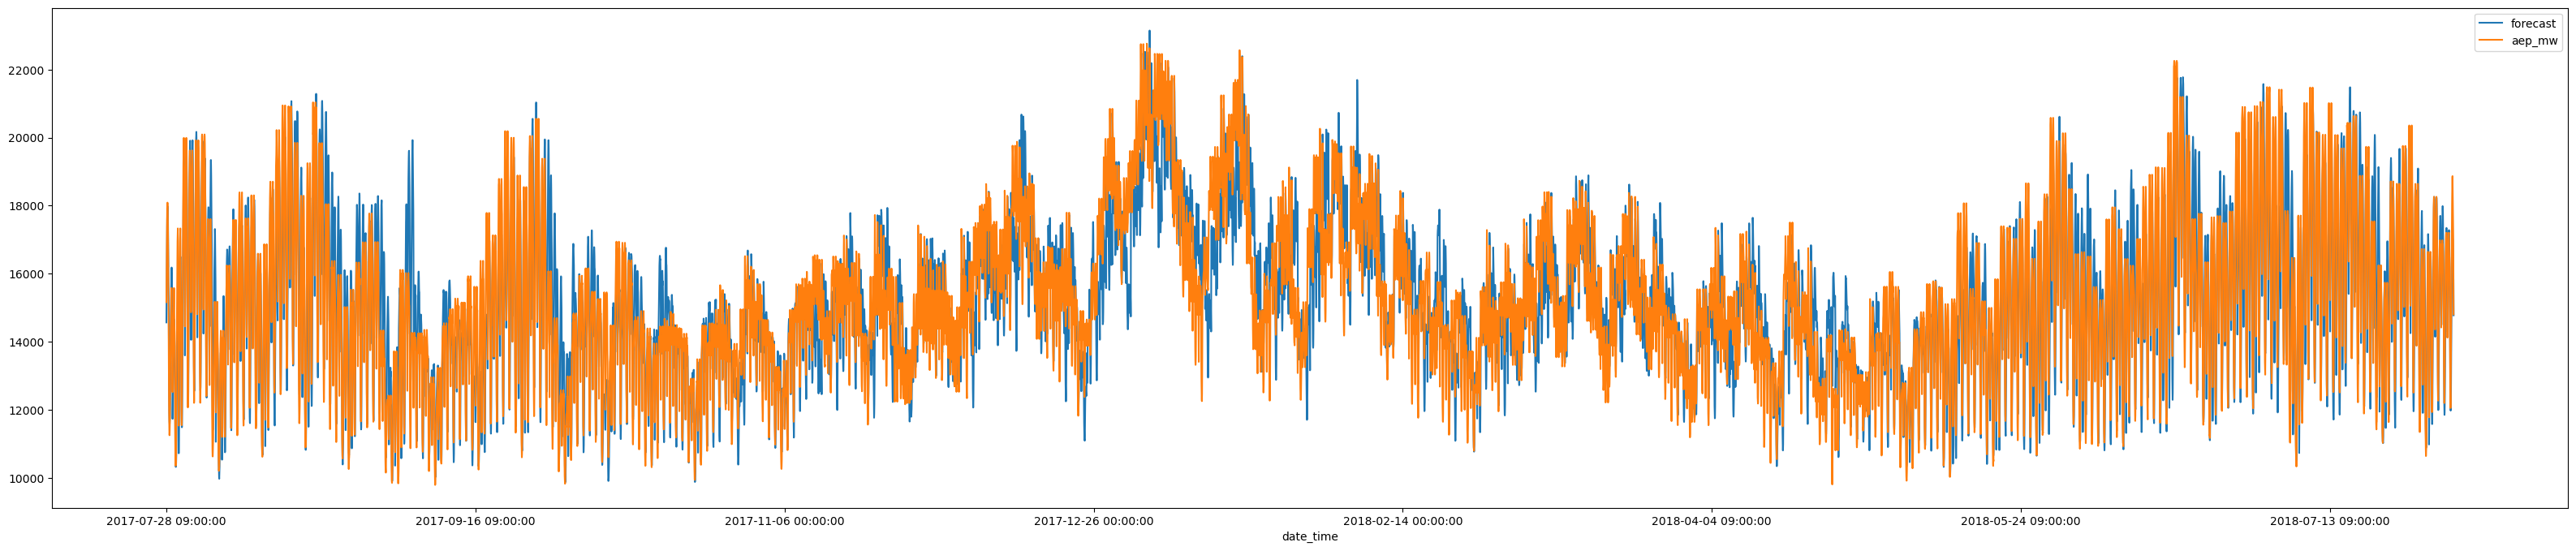

In [113]:
forecast_dayahead.plot(figsize=(40,8))

In [145]:
mean_absolute_percentage_error(forecast_dayahead['aep_mw'],forecast_dayahead['forecast'])

0.06715638135297844

In [148]:
mean_absolute_error(forecast_dayahead['aep_mw'],forecast_dayahead['forecast'])

1018.9965229756124

In [150]:
forecast_dayahead['aep_mw'].max(),forecast_dayahead['aep_mw'].min()

(22759.0, 9801.0)

In [146]:
len(pd.Series(forecast_dayahead.index))

8880

In [147]:
import plotly.graph_objects as go 
figure=go.Figure()
figure.add_trace(go.Scatter(x=forecast_dayahead.index,y=forecast_dayahead['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(x=forecast_dayahead.index,y=forecast_dayahead['forecast'],name='xgboost_forecast'))